In [48]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
df = pd.read_csv('C:\\Users\\yashh\\OneDrive\\Desktop\\CS 4375\\Logistic Regression\\titanic.csv')

<AxesSubplot:>

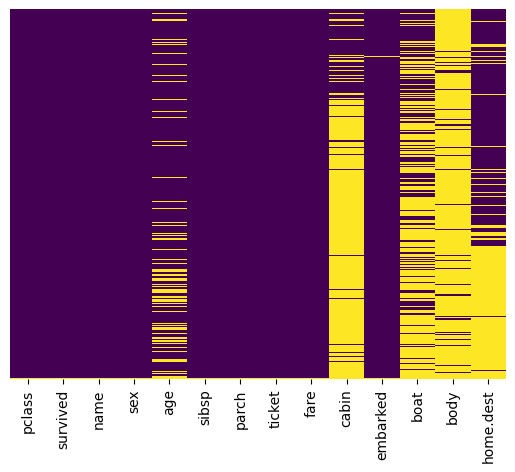

In [50]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [51]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [52]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [54]:
df['boat']

0         2
1        11
2       NaN
3       NaN
4       NaN
       ... 
1305    NaN
1306    NaN
1307    NaN
1308    NaN
1309    NaN
Name: boat, Length: 1310, dtype: object

In [55]:
df['boat'].isnull().sum()

824

In [56]:
df['boat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1310 entries, 0 to 1309
Series name: boat
Non-Null Count  Dtype 
--------------  ----- 
486 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB


In [57]:
df[['boat', 'survived']].isnull().sum()

boat        824
survived      1
dtype: int64

In [58]:
#boat, body, cabin, home.dest missing almost all values as it is depocted in the heatmap, sum, and info
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace=True) 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


<AxesSubplot:>

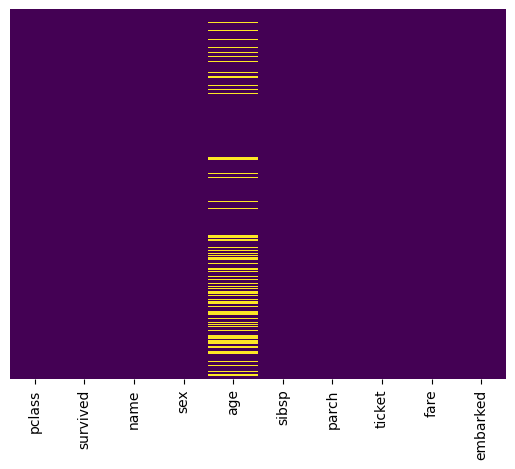

In [60]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [77]:
print(df['age'].isnull().sum())
print(df['embarked'].isnull().sum())

264
3


In [78]:
#264 out of 1309
264/1309 #20% is missing

0.20168067226890757

<AxesSubplot:xlabel='survived', ylabel='count'>

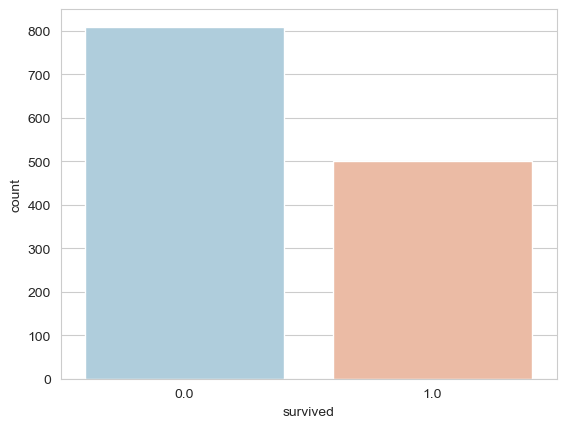

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data = df, palette = 'RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

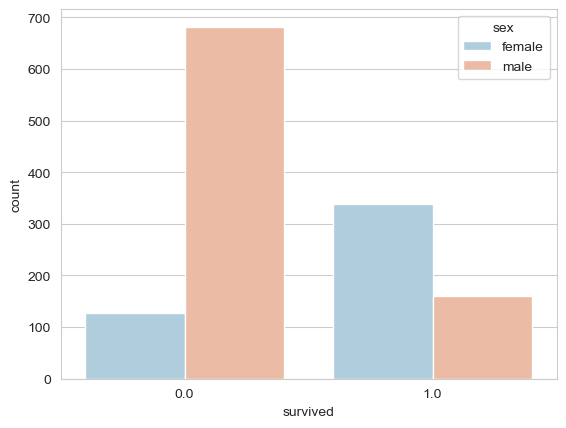

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue = 'sex', data = df, palette = 'RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

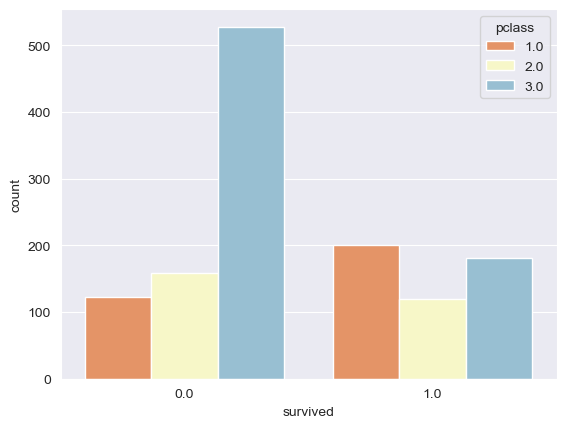

In [81]:
sns.set_style('darkgrid')
sns.countplot(x='survived', hue = 'pclass', data = df, palette = 'RdYlBu')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


In [83]:
df[['pclass', 'fare']]

,pclass,fare
0,1.0,211.3375
1,1.0,151.5500
2,1.0,151.5500
3,1.0,151.5500
4,1.0,151.5500
...,...,...
1305,3.0,14.4542
1306,3.0,7.2250
1307,3.0,7.2250
1308,3.0,7.8750


<AxesSubplot:xlabel='pclass', ylabel='age'>

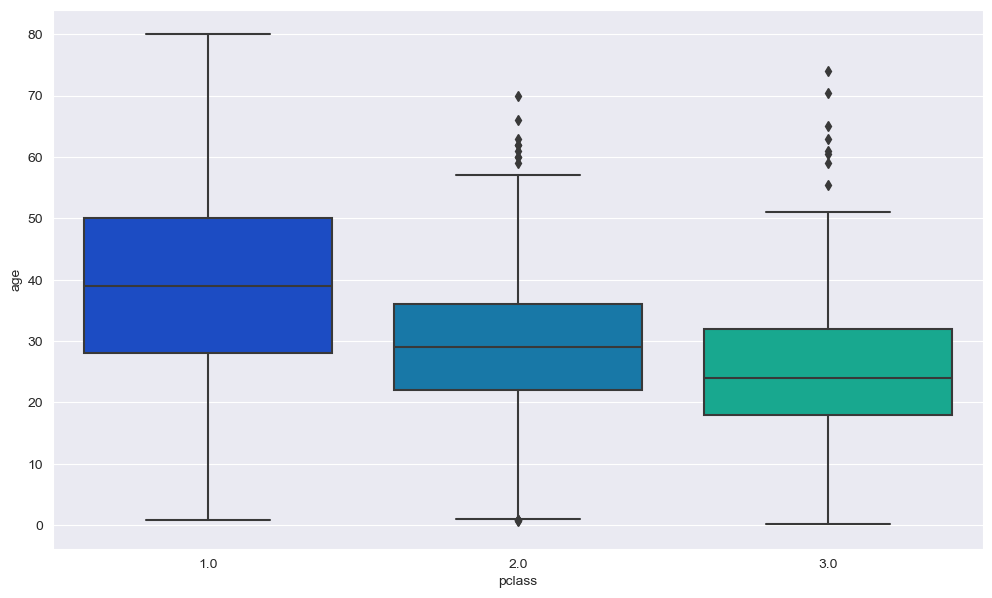

In [84]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass', y = 'age', data = df, palette = 'winter')

In [88]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [89]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

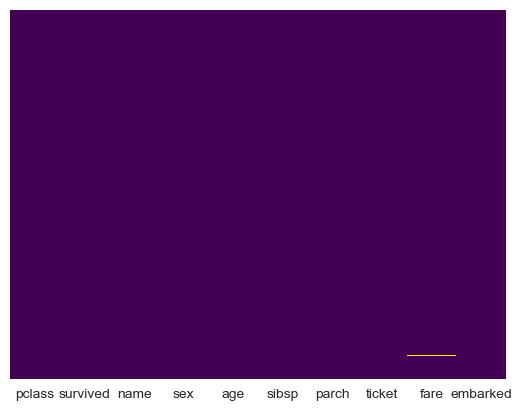

In [90]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [91]:
df.dropna(inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   float64
 6   parch     1306 non-null   float64
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.2+ KB


In [94]:
#write group by showing the counts for embarked
df.head(100)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0000,1.0,1.0,33638,81.8583,S
96,1.0,0.0,"Douglas, Mr. Walter Donald",male,50.0000,1.0,0.0,PC 17761,106.4250,C
97,1.0,1.0,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0000,1.0,1.0,PC 17558,247.5208,C
98,1.0,1.0,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0000,1.0,0.0,PC 17761,106.4250,C


In [95]:
gender = pd.get_dummies(df['sex'], drop_first = True)
embark = pd.get_dummies(df['embarked'], drop_first = True)
df.drop(['sex', 'embarked', 'name', 'ticket'], axis = 1, inplace = True)

In [96]:
df.head(20)

,pclass,survived,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
5,1.0,1.0,48.0000,0.0,0.0,26.5500
6,1.0,1.0,63.0000,1.0,0.0,77.9583
7,1.0,0.0,39.0000,0.0,0.0,0.0000
8,1.0,1.0,53.0000,2.0,0.0,51.4792
9,1.0,0.0,71.0000,0.0,0.0,49.5042


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   float64
 4   parch     1306 non-null   float64
 5   fare      1306 non-null   float64
dtypes: float64(6)
memory usage: 71.4 KB


In [99]:
df = pd.concat([df, gender, embark], axis=1)

In [100]:
df.head(25)

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1
5,1.0,1.0,48.0000,0.0,0.0,26.5500,1,0,1
6,1.0,1.0,63.0000,1.0,0.0,77.9583,0,0,1
7,1.0,0.0,39.0000,0.0,0.0,0.0000,1,0,1
8,1.0,1.0,53.0000,2.0,0.0,51.4792,0,0,1
9,1.0,0.0,71.0000,0.0,0.0,49.5042,1,0,0


In [101]:
# we just completed data cleanup

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis = 1), 
                                                    df['survived'], test_size = 0.30, random_state = 101)

In [102]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [103]:
predictions = logmodel.predict(X_test)

In [1]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

NameError: name 'y_test' is not defined